# <center>INFO204 Assignment 1 - Handwritten Digits Classification</center>
### <center>10 Marks</center>

Group Members (Fill in details)

|Name |StudentID |
|---|---|
|Yohan de Rose | 7244414|

In this assignment, we use Scikit Learn's handwritten "digits" dataset to practise a number of skills, including data manipulation, visualization using PCA, classification, and performance evaluation using ROC and cross validation. 

You can form a group with a fellow student to do this assignment together. Submit your completed notebook through Blackboard by **<font color="red">11:59pm Friday 31 August.</font> ** Submit one notebook only per group. 

Here are some useful scikit.learn resources for your reference:
- <a href="http://scikit-learn.org/stable/datasets/index.html" target="_new">Sklearn dataset utilities</a>
- <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_new">train_test_split</a>
- <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html" target="_new">ROC with cross validation</a>

#### <font color="red">Dear Professor, please be aware that two cells in question 3 may take some time to run depending on your machine's capabilities. Cheers.</font>

## Part 1. Data Manipulation and Visualization
For the first part of the assignment, complete the following tasks [3 marks]:
1. Import Sklearn's datasets utilities to load in the "digits" dataset. Use "X" to store digit arrays, "y" class labels. 
2. Report the dataset's information: 
    - names: attribute names, class names;
    - number of instances: total, per class;
    - images: display an instance for each digit class as an image 

As an example, to display X[0] as a digit image, try 
<pre>plt.imshow(X[0].reshape(8,8).astype('uint8'), cmap=plt.cm.gray)</pre>

3. Use PCA to extract the first two principal components and visualize the transformed dataset using class labels. Comment on the seperability of the classes. 


In [65]:
#0. Neccessary imports for this assignment
import sklearn.datasets as datasets
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns; sns.set()
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

%matplotlib inline
init_notebook_mode(connected=True)
plt.style.use('seaborn-white')

We have 1797 entries of 64 element image data arrays in 'data'.

What are the target names?
[0 1 2 3 4 5 6 7 8 9]

How often does each class occur?
3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: Instances, dtype: int64

Lets look at a visual representation of the data:


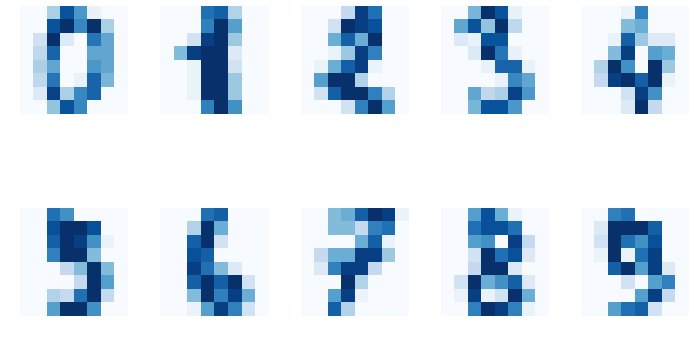

In [66]:
#1. setting things up
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

# 2.a
print "We have {} entries of {} element image data arrays in 'data'.".format(dataset['data'].shape[0],
                                                                             dataset['data'].shape[1])
print 
print "What are the target names?"
print dataset['target_names']
print

# 2.b
df = pd.DataFrame(data=y, columns=['Instances'])
print "How often does each class occur?"
print df['Instances'].value_counts()
print

# 2.c
print "Lets look at a visual representation of the data:"
fig = figure(num=None, figsize=(12, 7.41641), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0, wspace=0.3)
for i in range(1,11):
    ax = plt.subplot(2,5,i)
    ax.axis('off')
    ax.imshow(X[i-1].reshape(8,8).astype('uint8'), cmap=plt.cm.Blues, interpolation='nearest')
    fig.add_axes(ax)
plt.show()

In [67]:
#Use PCA to extract the first two principal components 
#and visualize the transformed dataset using class labels. 
#Comment on the seperability of the classes.

# 3
pca = PCA(n_components=2)
#lets find the principal components from standardised data
pc = pca.fit_transform(StandardScaler().fit_transform(X))
#chuck them into a dataframe
df = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])
df['Target'] = y
df.head()

,PC1,PC2,Target
0,1.914238,-0.954490,0
1,0.588985,0.924642,1
2,1.302085,-0.317177,2
3,-3.020771,-0.868778,3
4,4.528966,-1.093462,4


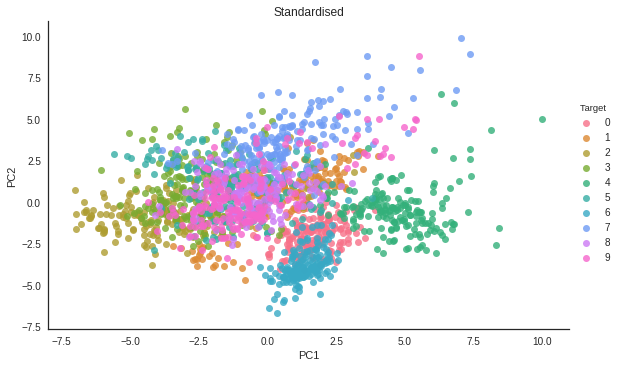

In [68]:
#and visualise them 
sns.lmplot('PC1', 'PC2', data=df, hue='Target', fit_reg=False, aspect=1.618034)
plt.title('Standardised')
plt.show()

>- #### It seems that classes have somewhat defined regions, though some however spread out into many regions ie 8 and 4. 
>- #### We might hypothesise then, that due to this, classifiers may have diffuculty reliably distinguishing the 8 class.

---
---

## Part 2. Confusion matrix
Now, randomly split the "digits" dataset into a training set (70%) and testing set (30%), and employ the $k$-nearest neighbour classifier and the support vector classifier (SVC) to classify the dataset. For each classifier, report the corresponding confusion matrix and comment on the result. [2 marks]

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## SVC

In [70]:
sv_model = SVC().fit(X_train, y_train)  
sv_predict = sv_model.predict(X_test)
print confusion_matrix(y_test, sv_predict)
print
print "Accuracy of this model: {}".format(accuracy_score(y_test, sv_predict))

[[21  0  0  0  0  0  0  0 32  0]
 [ 0 21  0  0  0  0  0  0 29  0]
 [ 0  0 26  0  0  0  0  0 21  0]
 [ 0  0  0 26  0  0  0  0 28  0]
 [ 0  0  0  0 15  0  0  0 45  0]
 [ 0  0  0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0 35  0 18  0]
 [ 0  0  0  0  0  0  0 19 36  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  0 53  6]]

Accuracy of this model: 0.392592592593


>- #### Here we can see the default SVC config frequently predicting 8 when its given something else (many false positives).
>- #### From the standardised pca plot hypothesis and this matrix we can definitively say the default SVC model is having trouble classifying the 8 class from other classes.

## KNN

In [71]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)
print confusion_matrix(y_test, knn_predict)
print
print "Accuracy of this model: {}".format(accuracy_score(y_test, knn_predict))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]

Accuracy of this model: 0.992592592593


>- #### The default nearest neighbour classifier performs excelently compared to the default SVC.
>- #### The model almost every time is able to predict the actual data.

---
---

## Part 3. ROC and AUC
Let us now focus on Class "8" for an obvious reason. Change the multi-class classification problem into a binary, 8 vs non-8, classification problem. Use a 10-fold cross validation process, calculate the average ROC and AUC values for the kNN and SVC classifiers. Tune the classifier parameters and report the best outcome. 

To be exact, follow these steps:
- If necessary, convert our data arrays X,y for the new problem. [1 mark]
- Calculate ROC and AUC for the binary 8 vs non-8 classification using a random split.  [2 marks]
- Employ 10-fold CV to tune the classifiers and generate the best average ROC and AUC results. [2 marks]

In [72]:
# 3.a

#define non 8 classes as 0 and 8 as 1
for i in range(1797):
    if y[i] != 8:
        y[i] = 0
    else:
        y[i] = 1
df = pd.DataFrame(data=X)
df['Target'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,1
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,0


---

## SVC

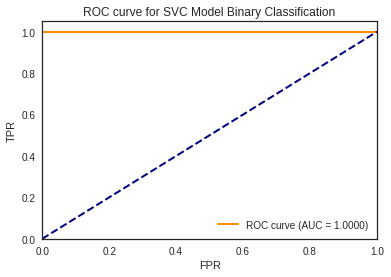

In [73]:
# 3.b

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = SVC(probability=True).fit(X_train, y_train)  # create and train model 
probas_ =  model.predict_proba(X_test)  # find associated probablities

# Compute ROC curve and area the curve for the "1" class
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)     # calculate AUC

# plot results
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for SVC Model Binary Classification')
plt.legend(loc="lower right");   # ';' used to suppress text output
plt.show()

In [74]:
# 3.c

#For the SVC we can use a great class called GridSearchCV to perform nfold cv
#on, using as many combinations of parameters as we define 

def svc_param_selection(X, y, nfolds):
    kf=KFold(n_splits=nfolds, shuffle=True, random_state=None)
    cs = [0.001, 0.01, 0.1, 1, 10]
    gs = [0.001, 0.01, 0.1, 1]
    ks = ['linear', 'poly', 'rbf']
    
    param_grid = {'C':cs, 'gamma':gs, 'kernel':ks}
    grid_search = GridSearchCV(SVC(), param_grid, cv=kf)
    grid_search.fit(X, y)
    return grid_search.best_params_

#Calling our method will output the ideal parameters for this classifier on the data
svc_param_selection(X, y, 10)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

>- #### The svc default config performs really well on the binary data, as seen in the ROC.
>- #### Using our method, we cleanly found ideal parameters that distinguish the 8 class.
>- #### Feeding these results (C=10, gamma=0.001, kernel='rbf') back into a classifier on the non-binary data, our svc goes from ~40% accuracy to ~99%!

---

## KNN

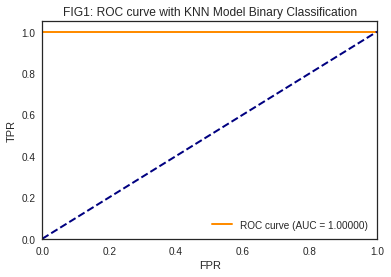

In [75]:
# 3.b

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = KNeighborsClassifier().fit(X_train, y_train)  # create and train model 
probas_ =  model.predict_proba(X_test)  # find associated probablities

# Compute ROC curve and area the curve for the "1" class
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)     # calculate AUC

# plot results
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('FIG1: ROC curve with KNN Model Binary Classification')
plt.legend(loc="lower right");   # ';' used to suppress text output
plt.show()

In [76]:
# 3.c
def knn_param_selection(X, y, k_max, nfolds):
    kf=KFold(n_splits=nfolds, shuffle=True, random_state=None)
    ns = range(1,k_max)
    scores = []
    for n in ns:
        model = KNeighborsClassifier(n_neighbors=n)
        total = []
        #run nfold cv on this n, 10 times
        for i in range(10):
            total.append(cross_val_score(model, X, y, cv=kf))
        #append mean of values in total to the score for this n
        scores.append(np.array(total).mean())
        
    #returns each n tested, and corresponding mean score with nfold cv
    return ns,scores  

In [77]:
ns, scores = knn_param_selection(X, y, 20, 10)
iplot([{'x':ns, 'y':scores}])

>- #### The default KNN config also performs really well on binary data according to the ROC.
>- #### It seems from the above tests that k=3 is the optimal k on this binary data.
>- #### Feeding this k back into classifying the original data gives a slight accuracy decrease overall.

### End of Assignment_